In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv.imread('images/oldMan.jpg', 0)

In [3]:
def apply_gamma_correction(img, gamma_value):
    gamma_table = np.array([(x / 255) ** gamma_value * 255 for x in range(256)], dtype=np.uint8)
    corrected_img = cv.LUT(img, gamma_table)
    return corrected_img


In [4]:
image_darker = apply_gamma_correction(image, 1.5)
image_brighter = apply_gamma_correction(image, 0.5)

In [5]:
cv.imwrite('image_darker.jpg', image_darker)
cv.imwrite('image_brighter.jpg', image_brighter)

True

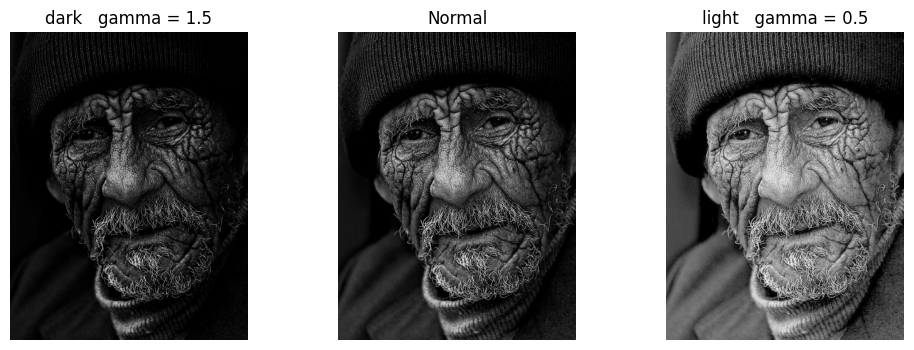

In [6]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(image_darker, cmap='gray')
plt.title('dark   gamma = 1.5')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image, cmap='gray')
plt.title('Normal')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_brighter, cmap='gray')
plt.title('light   gamma = 0.5')
plt.axis('off')

plt.savefig('output_image.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
equalized_darker = cv.equalizeHist(image_darker)
equalized_brighter = cv.equalizeHist(image_brighter)

In [8]:
cv.imwrite('equalized_darker.jpg', equalized_darker)
cv.imwrite('equalized_brighter.jpg', equalized_brighter)

True

In [9]:
images = [image_darker, image_brighter, image, equalized_darker, equalized_brighter]
titles = ['Original Darker', 'Original Brighter', 'Original', 'Equalized Darker', 'Equalized Brighter']

plt.figure(figsize=(30, 50))


<Figure size 3000x5000 with 0 Axes>

<Figure size 3000x5000 with 0 Axes>

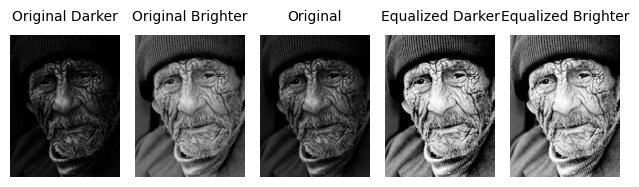

In [10]:
for i in range(5):

    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i], fontsize=10, pad=10) 
    plt.axis('off')

plt.tight_layout()
plt.show()

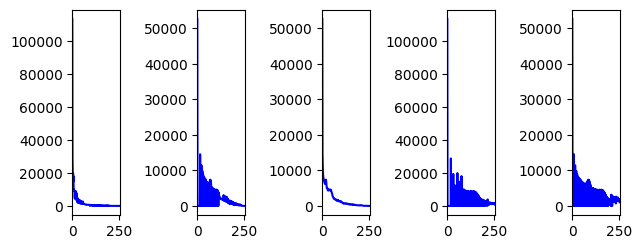

In [16]:

for i in range(5):

    plt.subplot(2, 5, i + 6)
    hist = cv.calcHist([images[i]], [0], None, [256], [0, 256])
    plt.plot(hist, color='blue')
    plt.xlim([0, 256])
    
plt.tight_layout()
plt.show()
